In [1]:
import os
from sqlalchemy import create_engine
import dotenv
import pandas as pd
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz

sns.set(style="darkgrid", palette="muted", color_codes=True)

In [2]:
# Load Database
dotenv.load_dotenv()
engine = create_engine(os.environ.get("POSTGRES_URI"), pool_pre_ping=True)

In [3]:
df = pd.read_sql(sqlalchemy.text("SELECT * from inventory_ledger"), engine)
df.head()

,id,timestamp,red_ml,green_ml,blue_ml,dark_ml,gold,description
0,247,2023-10-20 04:32:16.540154+00:00,0,0,0,0,-100,Barrel Delivery
1,249,2023-10-20 06:27:06.460541+00:00,-500,0,0,0,0,Bottle Delivery
2,252,2023-10-20 12:16:08.914300+00:00,1000,0,0,0,0,Barrel Delivery
3,261,2023-10-21 00:32:05.077199+00:00,200,0,0,0,0,Barrel Delivery
4,265,2023-10-21 04:19:53.959077+00:00,0,0,0,0,-200,Barrel Delivery


In [4]:
df_current_values = df.sort_values(by='timestamp')
for stock_type in ['red_ml', 'green_ml', 'blue_ml', 'dark_ml', 'gold']:
    df_current_values[stock_type + "_curr"] = df_current_values[stock_type].cumsum()
df_current_values['nice_timestamp'] = df_current_values['timestamp'].dt.tz_convert("America/Los_Angeles").dt.strftime('%m-%d %I:%M %p')
df_current_values = df_current_values.melt(id_vars=["timestamp", "nice_timestamp"], 
        var_name="StockType", 
        value_name="Value")
df_current_values.tail()

,timestamp,nice_timestamp,StockType,Value
679,2023-10-21 20:33:16.552020+00:00,10-21 01:33 PM,gold_curr,35
680,2023-10-21 20:41:06.120700+00:00,10-21 01:41 PM,gold_curr,350
681,2023-10-21 20:41:06.142419+00:00,10-21 01:41 PM,gold_curr,485
682,2023-10-21 20:41:06.173682+00:00,10-21 01:41 PM,gold_curr,710
683,2023-10-21 20:41:06.203977+00:00,10-21 01:41 PM,gold_curr,1070


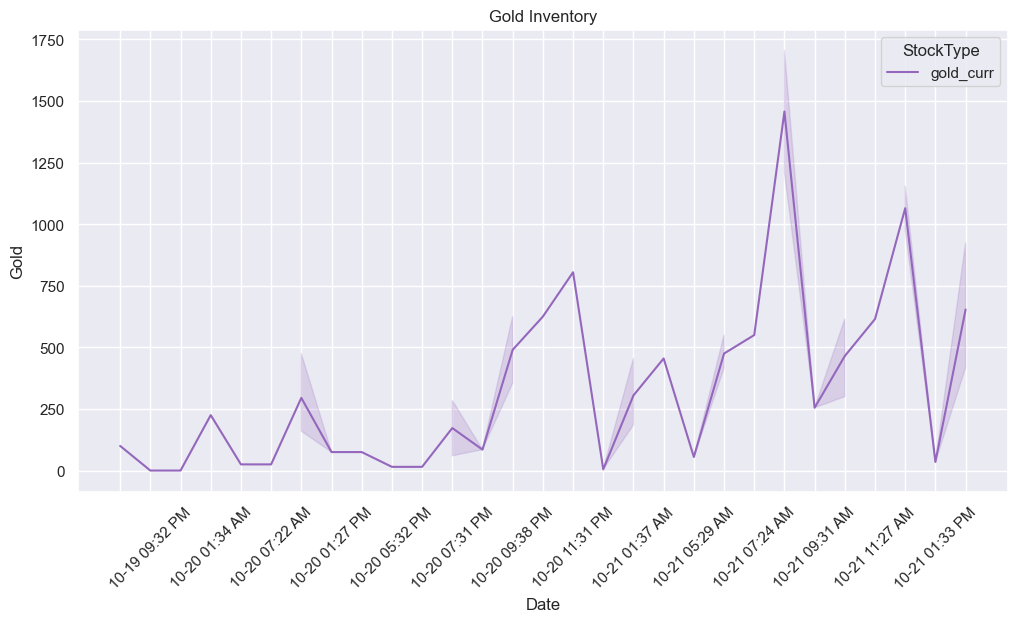

In [5]:
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.lineplot(data=df_current_values[df_current_values['StockType'] == "gold_curr"],hue='StockType', x='nice_timestamp', y='Value',palette=['tab:purple'], ax=ax)
ax.set(xlabel='Date', ylabel='Gold', title='Gold Inventory')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
_ = plt.xticks(rotation=45)

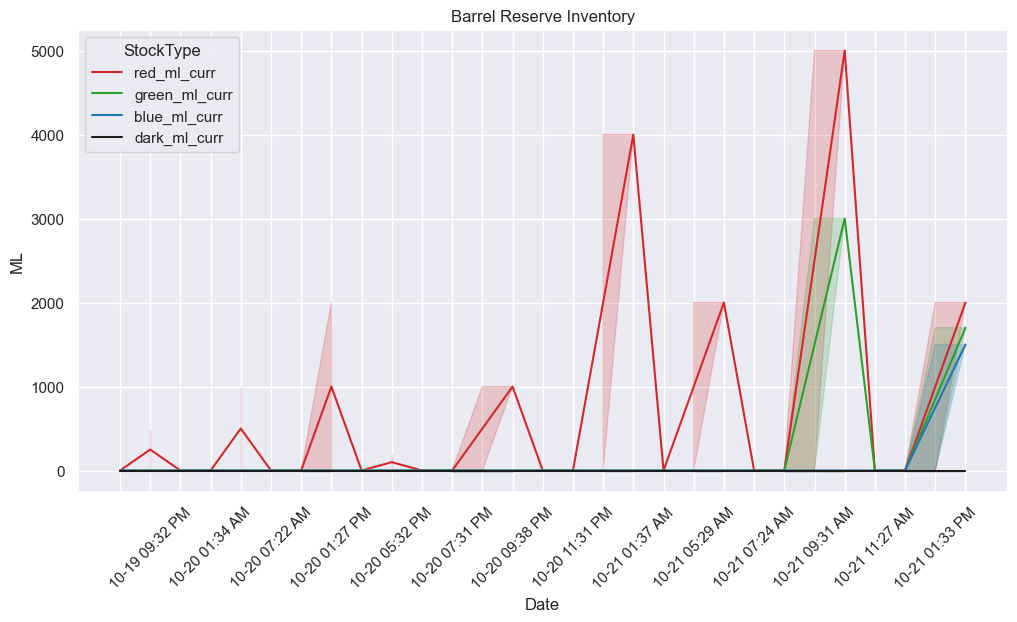

In [6]:
fig, ax = plt.subplots(figsize = (12,6))

red_green_blue_dark_values = df_current_values[
    (df_current_values['StockType'] == "red_ml_curr")
    | (df_current_values['StockType'] == "green_ml_curr")
    | (df_current_values['StockType'] == "blue_ml_curr")
    | (df_current_values['StockType'] == "dark_ml_curr")
    ][['nice_timestamp', 'StockType', 'Value']]



fig = sns.lineplot(data=red_green_blue_dark_values, x='nice_timestamp', y='Value', hue='StockType', palette=['tab:red','tab:green', 'tab:blue','k'], ax=ax)
ax.set(xlabel='Date', ylabel='ML', title='Barrel Reserve Inventory')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
_ = plt.xticks(rotation=45)